# Import Eppy and Set Work Environment

In this cell we import the EnergyPlus idd file, building idf file, and materials idf file that contains our material library (which we will require later on).

In [1]:
import sys
from eppy import modeleditor
from eppy.modeleditor import IDF
iddfile = r"C:\EnergyPlusV9-5-0\Energy+.idd" #change to your energy+ idd filepath
fname1 = r"C:\Users\GRA\simulation\Building_1_5569bbdd\OpenStudio\run\in.idf" #change to your idf file path
fname2 = r"C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\materials.idf" #change to your materials idf filepath
weather_file = r"C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw" #change to your weather file path


In [2]:
IDF.setiddname(iddfile)
idf1 = IDF(fname1, weather_file)
materials = IDF(fname2, weather_file)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Run IDF

In [4]:
idf1.run()


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\PhD\Courses\OSE\OSE_Delivery --idd C:\EnergyPlusV9-5-0\Energy+.idd C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\PhD\Courses\OSE\OSE_Delivery\in.idf



# Data Visualization

To visualize the data we need to import esoreader, which reads the eso file that is returned by the E+ simulation

In [5]:
import esoreader

In [6]:
eso = esoreader.read_from_path(r"C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\eplusout.eso")

The eso file returns multiple python dictionaries with integer keys as seen above

In [7]:
eso.dd.variables

{3794: ['Annual',
  'FLR1_BUILDING_1_5569BBDD_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM',
  'Zone Ideal Loads Supply Air Total Heating Energy',
  'J'],
 3843: ['Annual',
  'FLR1_BUILDING_1_5569BBDD_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM',
  'Zone Ideal Loads Supply Air Total Cooling Energy',
  'J'],
 3892: ['Annual',
  'FLR1_BUILDING_2_BC751240_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM',
  'Zone Ideal Loads Supply Air Total Heating Energy',
  'J'],
 3893: ['Annual',
  'FLR1_BUILDING_2_BC751240_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM',
  'Zone Ideal Loads Supply Air Total Cooling Energy',
  'J'],
 3894: ['Annual',
  'FLR1_BUILDING_3_603238D8_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM',
  'Zone Ideal Loads Supply Air Total Heating Energy',
  'J'],
 3895: ['Annual',
  'FLR1_BUILDING_3_603238D8_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM',
  'Zone Ideal Loads Supply Air Total Cooling Energy',
  'J'],
 3896: ['Annual',
  'FLR1_BUILDING_3_603238D8_FLOOR2_ROOM1 IDEAL LOADS AIR SYSTEM',
  'Zone Ideal Loads Supply Air Total Hea

In [8]:
pd.DataFrame(eso.data).T

,0
3794,4.614977e+09
3843,1.552938e+10
3892,4.618025e+09
3893,1.476579e+10
3894,5.834911e+09
...,...
3977,1.948732e+10
3978,2.816721e+09
3979,1.950125e+10
3980,2.875565e+09


As seen, we have a dictionary that yields the output timestep, building name, and output nme, for each key, and a dictionary that yields each key's respective data. Thus, we can create a dataframe from a dictionary for target keys that we want to visualize or study.

In [9]:
eso.dd.variables.keys()

dict_keys([3794, 3843, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979, 3980, 3981])

In [10]:
targets = eso.dd.variables.keys()
results = pd.DataFrame({eso.dd.variables[key][1] + " " + eso.dd.variables[key][2]: eso.data[key] for key in targets}).T

In [11]:
results

,0
FLR1_BUILDING_1_5569BBDD_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM Zone Ideal Loads Supply Air Total Heating Energy,4.614977e+09
FLR1_BUILDING_1_5569BBDD_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM Zone Ideal Loads Supply Air Total Cooling Energy,1.552938e+10
FLR1_BUILDING_2_BC751240_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM Zone Ideal Loads Supply Air Total Heating Energy,4.618025e+09
FLR1_BUILDING_2_BC751240_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM Zone Ideal Loads Supply Air Total Cooling Energy,1.476579e+10
FLR1_BUILDING_3_603238D8_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM Zone Ideal Loads Supply Air Total Heating Energy,5.834911e+09
...,...
FLR7_BUILDING_5_7A633902_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM Zone Ideal Loads Supply Air Total Cooling Energy,1.948732e+10
FLR7_BUILDING_6_BF617F38_FLOOR3_ROOM1 IDEAL LOADS AIR SYSTEM Zone Ideal Loads Supply Air Total Heating Energy,2.816721e+09
FLR7_BUILDING_6_BF617F38_FLOOR3_ROOM1 IDEAL LOADS AIR SYSTEM Zone Ideal Loads Supply Air Total Cooling Energy,1.950125e+10
FLR8_BUILDING_5_7A633902_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM Zone Ideal Loads Supply Air Total Heating Energy,2.875565e+09


In [12]:
results.index[0]

'FLR1_BUILDING_1_5569BBDD_FLOOR1_ROOM1 IDEAL LOADS AIR SYSTEM Zone Ideal Loads Supply Air Total Heating Energy'

Now, we split heating and cooling values for the all the building zones

In [13]:
heating = []
for i in enumerate(results.index):
    if "Heating" in i[1]:
        heating.append(results.iloc[i[0]].values)


In [14]:
len(heating)

46

In [15]:
cooling = []
for i in enumerate(results.index):
    if "Cooling" in i[1]:
        cooling.append(results.iloc[i[0]].values)

In [16]:
len(cooling)

46

In [17]:
results_split = pd.DataFrame([heating, cooling]).T
results_split.columns = ["Total heating energy (J)", "Total cooling energy (J)"]

In [18]:
results_split

,Total heating energy (J),Total cooling energy (J)
0,[4614976783.761764],[15529378703.55029]
1,[4618025107.082127],[14765787012.410763]
2,[5834910666.691963],[17862167813.759945]
3,[3653393974.003675],[26667892582.80259]
4,[4182168630.245817],[15876645458.11516]
5,[24538896744.508858],[19532526333.806126]
6,[3327242074.2722335],[19320742876.183212]
7,[2579685424.252854],[19294827522.5631]
8,[2636921824.0069942],[19396687579.797432]
9,[6095334672.695688],[10675320295.74842]


In [19]:
total_energy = results_split["Total heating energy (J)"] + results_split["Total cooling energy (J)"]
total_energy = total_energy.sum()

# Creating zone Constructions and applying constructions to surfaces

In [20]:
construction = ["Reboco-2cm", "TijoloFurado_11", "XPS_4", "TijoloFurado_11", "Arg_Cimento_Clara_2.5", "Estuque_Claro_1.5"]

To apply constructions in the idf file we need to provide function arguments. Luckily unpacked dictionaries can work as a way to go around this requirement

In [21]:
def layer_from_index(i):
    if i == 0:
        return "Outside_Layer"
    else:
        return "Layer_" + str(i+1)

In [22]:
def layers_dict(construction):
    return {layer_from_index(i):kind for i, kind in enumerate(construction)}

In [23]:
layers_dict(construction)

{'Outside_Layer': 'Reboco-2cm',
 'Layer_2': 'TijoloFurado_11',
 'Layer_3': 'XPS_4',
 'Layer_4': 'TijoloFurado_11',
 'Layer_5': 'Arg_Cimento_Clara_2.5',
 'Layer_6': 'Estuque_Claro_1.5'}

We can then unpack the dictionary keys as the newidfobject function arguments, and values as argument values.

In [24]:
idf1.newidfobject("CONSTRUCTION",
                  Name="New_wall_construction_0",
                  **layers_dict(construction))


CONSTRUCTION,
    New_wall_construction_0,    !- Name
    Reboco-2cm,               !- Outside Layer
    TijoloFurado_11,          !- Layer 2
    XPS_4,                    !- Layer 3
    TijoloFurado_11,          !- Layer 4
    Arg_Cimento_Clara_2.5,    !- Layer 5
    Estuque_Claro_1.5;        !- Layer 6

# Optimization problem

Imagining that we are planning the construction materials for a mixed-use complex of 6 buildings. We want to find the best possible combination of constructions on each surface type that yields the least energy consumption, with the least possible cost. However, if we have $3$ possible constructions for each building exterior wall, roof, floor, and window elements,  we have $3^24$ possible combinations. To model our optimization problem and decision variables, we need to perform some data gathering first. Let's start by resetting our idf file to the original, concatenating our materials library, and copying it to our building IDF.

In [25]:
idf1 = IDF(fname1, weather_file)
materials = IDF(fname2, weather_file)
mats = materials.idfobjects["MATERIAL"] #Opaque materials
window_mats = materials.idfobjects["WINDOWMATERIAL:GLAZING"] #Window materials - Glazings
window_airgaps_mats = materials.idfobjects["WINDOWMATERIAL:GAS"] #Window materials - Airgaps
airgap_mats = materials.idfobjects["MATERIAL:AIRGAP"] #airgap materials for opaque constructions
constructions = idf1.idfobjects["CONSTRUCTION"]
full_mats = []
for i in [mats, window_mats, window_airgaps_mats, airgap_mats]:
    full_mats = np.append(full_mats, i) #appends all mats to a flat array
    
for mat in full_mats:
    mat.Name = mat.Name.replace(" ", "") #replaces spaces
    
for mat in full_mats:
    idf1.copyidfobject(mat) #copy mats to building idf file

Then we define the possible construction for each element type - walls, floors, and windows, and their respective cost/m2

In [26]:
Wmaterials = [["Reboco-2cm", "TijoloFurado_15", "AirGap", "TijoloFurado_11", "Estuque_Claro_1.5"],
              ["Reboco-2cm", "TijoloFurado_11", "AirGap", "TijoloFurado_11", "Estuque_Claro_1.5"],
              ["Reboco-2cm", "TijoloFurado_15", "AirGap", "IsolamentoXPS-4cm", "TijoloFurado_11", "Estuque_Claro_1.5"]]

wall_costs = [25, 20, 45]

Fmaterials = [["PaineisdeMadeira_12", "Estuque_Claro_1.5"],
              ["Ceramicavidrada-1cm", "BetonilhadeAcentamento_8", "LajeBetao_15", "Estuque_Claro_1.5"],
              ["Ceramicavidrada-1cm", "BetonilhadeAcentamento_8", "LajeAligeirada_0.25", "Estuque_Claro_1.5"]]

floor_costs = [10, 25, 30]

roof_materials = [["BetonilhadeAcentamento_8", "Telaimpermeabilizacao-2mm", "BetonilhadeAcentamento_8", "LajeAligeirada_0.25", "Estuque_Claro_1.5"], 
                  ["BetonilhadeAcentamento_8", "Telaimpermeabilizacao-2mm", "IsolamentoXPS-4cm", "BetonilhadeAcentamento_8", "LajeAligeirada_0.25", "Estuque_Claro_1.5"], 
                  ["BetonilhadeAcentamento_8", "Telaimpermeabilizacao-2mm", "IsolamentoXPS-4cm", "BetonilhadeAcentamento_8", "LajeBetao_15", "Estuque_Claro_1.5"]]

roof_costs = [20, 30, 35]

Wndmaterials = [[2.69, 0.75, 0.8], [1.70, 0.38, 0.7], [1.25, 0.2, 0.7]]

window_costs = [50, 80, 100]


We need to create ceiling materials = to floor materials but in a reverse layer order, for the energy plus tool to identify the adjacency and boundary

In [27]:
Ceilings = []
for Fmaterial in Fmaterials:
    Ceilings.append(Fmaterial[::-1])

In [28]:
Ceilings

[['Estuque_Claro_1.5', 'PaineisdeMadeira_12'],
 ['Estuque_Claro_1.5',
  'LajeBetao_15',
  'BetonilhadeAcentamento_8',
  'Ceramicavidrada-1cm'],
 ['Estuque_Claro_1.5',
  'LajeAligeirada_0.25',
  'BetonilhadeAcentamento_8',
  'Ceramicavidrada-1cm']]

lets start by inserting these constructions in the new idf. We can start by setting new glazing system materials for each window since we haven't done it yet, and then define our constructions according to the selected materials

In [29]:
for mat in enumerate(Wndmaterials):
    idf1.newidfobject("WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM",
                           Name='window_' + str(mat[0]),
                           UFactor = float(mat[1][0]),
                           Solar_Heat_Gain_Coefficient= float(mat[1][1]),
                           Visible_Transmittance = float(mat[1][2]))

In [30]:
window_mats = idf1.idfobjects["WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM"]

In [31]:
window_mats

[
WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM,
    window_0,                 !- Name
    2.69,                     !- UFactor
    0.75,                     !- Solar Heat Gain Coefficient
    0.8;                      !- Visible Transmittance
, 
WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM,
    window_1,                 !- Name
    1.7,                      !- UFactor
    0.38,                     !- Solar Heat Gain Coefficient
    0.7;                      !- Visible Transmittance
, 
WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM,
    window_2,                 !- Name
    1.25,                     !- UFactor
    0.2,                      !- Solar Heat Gain Coefficient
    0.7;                      !- Visible Transmittance
]

In [32]:
for window_mat in enumerate(window_mats):
        idf1.newidfobject("CONSTRUCTION",
                          Name = window_mat[1].Name,
                          Outside_Layer = window_mat[1].Name)

In [33]:
constructions

[
Construction,
    Generic Context,          !- Name
    Material 2;               !- Outside Layer
, 
Construction,
    Generic Double Pane,      !- Name
    Generic Low-e Glass,      !- Outside Layer
    Generic Window Air Gap,    !- Layer 2
    Generic Clear Glass;      !- Layer 3
, 
Construction,
    Generic Exposed Floor,    !- Name
    Generic Painted Metal,    !- Outside Layer
    Generic Ceiling Air Gap,    !- Layer 2
    Generic 50mm Insulation,    !- Layer 3
    Generic LW Concrete;      !- Layer 4
, 
Construction,
    Generic Exterior Door,    !- Name
    Generic Painted Metal,    !- Outside Layer
    Generic 25mm Insulation,    !- Layer 2
    Generic Painted Metal;    !- Layer 3
, 
Construction,
    Generic Exterior Wall,    !- Name
    Generic Brick,            !- Outside Layer
    Generic LW Concrete,      !- Layer 2
    Generic 50mm Insulation,    !- Layer 3
    Generic Wall Air Gap,     !- Layer 4
    Generic Gypsum Board;     !- Layer 5
, 
Construction,
    Generic Gr

The window constructions are set in the idf, now we can move on to the walls.

In [34]:
for construction in enumerate(Wmaterials):
     idf1.newidfobject("CONSTRUCTION",
                       Name='EXT_WALL' + str(construction[0]),
                       **layers_dict(construction[1]))

In [35]:
constructions

[
Construction,
    Generic Context,          !- Name
    Material 2;               !- Outside Layer
, 
Construction,
    Generic Double Pane,      !- Name
    Generic Low-e Glass,      !- Outside Layer
    Generic Window Air Gap,    !- Layer 2
    Generic Clear Glass;      !- Layer 3
, 
Construction,
    Generic Exposed Floor,    !- Name
    Generic Painted Metal,    !- Outside Layer
    Generic Ceiling Air Gap,    !- Layer 2
    Generic 50mm Insulation,    !- Layer 3
    Generic LW Concrete;      !- Layer 4
, 
Construction,
    Generic Exterior Door,    !- Name
    Generic Painted Metal,    !- Outside Layer
    Generic 25mm Insulation,    !- Layer 2
    Generic Painted Metal;    !- Layer 3
, 
Construction,
    Generic Exterior Wall,    !- Name
    Generic Brick,            !- Outside Layer
    Generic LW Concrete,      !- Layer 2
    Generic 50mm Insulation,    !- Layer 3
    Generic Wall Air Gap,     !- Layer 4
    Generic Gypsum Board;     !- Layer 5
, 
Construction,
    Generic Gr

Now we do the same for the floor materials

In [36]:
for construction in enumerate(Fmaterials):
    idf1.newidfobject("CONSTRUCTION",
                      Name='floor_' + str(construction[0]),
                      **layers_dict(construction[1]))

In [37]:
constructions

[
Construction,
    Generic Context,          !- Name
    Material 2;               !- Outside Layer
, 
Construction,
    Generic Double Pane,      !- Name
    Generic Low-e Glass,      !- Outside Layer
    Generic Window Air Gap,    !- Layer 2
    Generic Clear Glass;      !- Layer 3
, 
Construction,
    Generic Exposed Floor,    !- Name
    Generic Painted Metal,    !- Outside Layer
    Generic Ceiling Air Gap,    !- Layer 2
    Generic 50mm Insulation,    !- Layer 3
    Generic LW Concrete;      !- Layer 4
, 
Construction,
    Generic Exterior Door,    !- Name
    Generic Painted Metal,    !- Outside Layer
    Generic 25mm Insulation,    !- Layer 2
    Generic Painted Metal;    !- Layer 3
, 
Construction,
    Generic Exterior Wall,    !- Name
    Generic Brick,            !- Outside Layer
    Generic LW Concrete,      !- Layer 2
    Generic 50mm Insulation,    !- Layer 3
    Generic Wall Air Gap,     !- Layer 4
    Generic Gypsum Board;     !- Layer 5
, 
Construction,
    Generic Gr

In [38]:
for construction in enumerate(Ceilings):
    idf1.newidfobject("CONSTRUCTION",
                      Name='ceiling_' + str(construction[0]),
                      **layers_dict(construction[1]))

In [39]:
constructions

[
Construction,
    Generic Context,          !- Name
    Material 2;               !- Outside Layer
, 
Construction,
    Generic Double Pane,      !- Name
    Generic Low-e Glass,      !- Outside Layer
    Generic Window Air Gap,    !- Layer 2
    Generic Clear Glass;      !- Layer 3
, 
Construction,
    Generic Exposed Floor,    !- Name
    Generic Painted Metal,    !- Outside Layer
    Generic Ceiling Air Gap,    !- Layer 2
    Generic 50mm Insulation,    !- Layer 3
    Generic LW Concrete;      !- Layer 4
, 
Construction,
    Generic Exterior Door,    !- Name
    Generic Painted Metal,    !- Outside Layer
    Generic 25mm Insulation,    !- Layer 2
    Generic Painted Metal;    !- Layer 3
, 
Construction,
    Generic Exterior Wall,    !- Name
    Generic Brick,            !- Outside Layer
    Generic LW Concrete,      !- Layer 2
    Generic 50mm Insulation,    !- Layer 3
    Generic Wall Air Gap,     !- Layer 4
    Generic Gypsum Board;     !- Layer 5
, 
Construction,
    Generic Gr

In [40]:
#Roof

In [41]:
for construction in enumerate(roof_materials):
    idf1.newidfobject("CONSTRUCTION",
                      Name='roof_' + str(construction[0]),
                      **layers_dict(construction[1]))

In [42]:
constructions

[
Construction,
    Generic Context,          !- Name
    Material 2;               !- Outside Layer
, 
Construction,
    Generic Double Pane,      !- Name
    Generic Low-e Glass,      !- Outside Layer
    Generic Window Air Gap,    !- Layer 2
    Generic Clear Glass;      !- Layer 3
, 
Construction,
    Generic Exposed Floor,    !- Name
    Generic Painted Metal,    !- Outside Layer
    Generic Ceiling Air Gap,    !- Layer 2
    Generic 50mm Insulation,    !- Layer 3
    Generic LW Concrete;      !- Layer 4
, 
Construction,
    Generic Exterior Door,    !- Name
    Generic Painted Metal,    !- Outside Layer
    Generic 25mm Insulation,    !- Layer 2
    Generic Painted Metal;    !- Layer 3
, 
Construction,
    Generic Exterior Wall,    !- Name
    Generic Brick,            !- Outside Layer
    Generic LW Concrete,      !- Layer 2
    Generic 50mm Insulation,    !- Layer 3
    Generic Wall Air Gap,     !- Layer 4
    Generic Gypsum Board;     !- Layer 5
, 
Construction,
    Generic Gr

Now that we have our constructions all set up, we can start elaborating the optimization function. We want an Energy function, that runs an idf with a specific combination of constructions, one for each surface type. Thus, we need to apply one construction solution, of one construction type to the whole building surfaces of that type. In this case, we want to optimize the exterior walls, floors, and windows. Let's isolate the surface elements we want to iterate constructions on.

In [43]:
opaque_surfaces = idf1.idfobjects["BuildingSurface:Detailed"]
window_surfaces = idf1.idfobjects["FenestrationSurface:Detailed"]

In [44]:
buildings_str = []
for n in np.linspace(1, 6, 6).astype("int"):
    buildings_str = np.append(buildings_str, "Building_" + str(n))

In [45]:
buildings_str

array(['Building_1', 'Building_2', 'Building_3', 'Building_4',
       'Building_5', 'Building_6'], dtype='<U32')

In [46]:
walls_per_building = {}
for building in buildings_str:
    walls_per_building[building] = []
    for opaque_surface in opaque_surfaces:
        if building in opaque_surface["Name"] and opaque_surface["Surface_Type"] == "Wall" and opaque_surface["Outside_Boundary_Condition"] == "Outdoors":
            walls_per_building[building].append(opaque_surface)

In [47]:
for surface in walls_per_building["Building_1"]:
    print(surface["Name"]) #test

Flr1_Building_1_5569bbdd_Floor1_Room1..Face1
Flr1_Building_1_5569bbdd_Floor1_Room1..Face2
Flr1_Building_1_5569bbdd_Floor1_Room1..Face3
Flr1_Building_1_5569bbdd_Floor1_Room1..Face4
Flr1_Ground_Building_1_5569bbdd_Floor1_Room1..Face1
Flr1_Ground_Building_1_5569bbdd_Floor1_Room1..Face2
Flr1_Ground_Building_1_5569bbdd_Floor1_Room1..Face3
Flr1_Ground_Building_1_5569bbdd_Floor1_Room1..Face4
Flr1_Top_Building_1_5569bbdd_Floor1_Room1..Face1
Flr1_Top_Building_1_5569bbdd_Floor1_Room1..Face2
Flr1_Top_Building_1_5569bbdd_Floor1_Room1..Face3
Flr1_Top_Building_1_5569bbdd_Floor1_Room1..Face4
Flr2_Building_1_5569bbdd_Floor1_Room1..Face1
Flr2_Building_1_5569bbdd_Floor1_Room1..Face2
Flr2_Building_1_5569bbdd_Floor1_Room1..Face3
Flr2_Building_1_5569bbdd_Floor1_Room1..Face4
Flr3_Building_1_5569bbdd_Floor1_Room1..Face1
Flr3_Building_1_5569bbdd_Floor1_Room1..Face2
Flr3_Building_1_5569bbdd_Floor1_Room1..Face3
Flr3_Building_1_5569bbdd_Floor1_Room1..Face4
Flr4_Building_1_5569bbdd_Floor1_Room1..Face1
Flr4_Buildi

Now we do the same for the floors, but since we don't have any optional ground floors, we only need to extract all the interior floors, which have a boundary condition of "Adiabatic". The ones that have a boundary condition of "Ground" are ground floors.

In [48]:
floors_per_building = {}
for building in buildings_str:
    floors_per_building[building] = []
    for opaque_surface in opaque_surfaces:
        if building in opaque_surface["Name"] and opaque_surface["Surface_Type"] == "Floor" and opaque_surface["Outside_Boundary_Condition"] == "Adiabatic":
            floors_per_building[building].append(opaque_surface)

In [49]:
for surface in floors_per_building["Building_1"]:
    print(surface["Name"]) #Test

Flr1_Building_1_5569bbdd_Floor1_Room1..Face0
Flr1_Top_Building_1_5569bbdd_Floor1_Room1..Face0
Flr2_Building_1_5569bbdd_Floor1_Room1..Face0
Flr3_Building_1_5569bbdd_Floor1_Room1..Face0
Flr4_Building_1_5569bbdd_Floor1_Room1..Face0
Flr5_Building_1_5569bbdd_Floor1_Room1..Face0


ceilings

In [50]:
ceilings_per_building = {}
for building in buildings_str:
    ceilings_per_building[building] = []
    for opaque_surface in opaque_surfaces:
        if building in opaque_surface["Name"] and opaque_surface["Surface_Type"] == "Ceiling":
            ceilings_per_building[building].append(opaque_surface)

In [51]:
for surface in ceilings_per_building["Building_1"]:
    print(surface["Name"]) #Test

Flr1_Building_1_5569bbdd_Floor1_Room1..Face5
Flr1_Ground_Building_1_5569bbdd_Floor1_Room1..Face5
Flr2_Building_1_5569bbdd_Floor1_Room1..Face5
Flr3_Building_1_5569bbdd_Floor1_Room1..Face5
Flr4_Building_1_5569bbdd_Floor1_Room1..Face5
Flr5_Building_1_5569bbdd_Floor1_Room1..Face5


Roofs

In [52]:
roofs_per_building = {}
for building in buildings_str:
    roofs_per_building[building] = []
    for opaque_surface in opaque_surfaces:
        if building in opaque_surface["Name"] and opaque_surface["Surface_Type"] == "Roof":
            roofs_per_building[building].append(opaque_surface)

In [53]:
for surface in roofs_per_building["Building_1"]:
    print(surface["Name"]) #Test

Flr1_Top_Building_1_5569bbdd_Floor1_Room1..Face5


Windows

In [54]:
windows_per_building = {}
for building in buildings_str:
    windows_per_building[building] = []
    for window_surface in window_surfaces:
        if building in window_surface["Name"]:
            windows_per_building[building].append(window_surface)

In [55]:
for surface in windows_per_building["Building_1"]:
    print(surface["Name"]) #Test

Flr1_Building_1_5569bbdd_Floor1_Room1..Face1_Glz0
Flr1_Building_1_5569bbdd_Floor1_Room1..Face1_Glz1
Flr1_Building_1_5569bbdd_Floor1_Room1..Face1_Glz2
Flr1_Building_1_5569bbdd_Floor1_Room1..Face1_Glz3
Flr1_Building_1_5569bbdd_Floor1_Room1..Face1_Glz4
Flr1_Building_1_5569bbdd_Floor1_Room1..Face1_Glz5
Flr1_Building_1_5569bbdd_Floor1_Room1..Face1_Glz6
Flr1_Building_1_5569bbdd_Floor1_Room1..Face2_Glz0
Flr1_Building_1_5569bbdd_Floor1_Room1..Face2_Glz1
Flr1_Building_1_5569bbdd_Floor1_Room1..Face2_Glz2
Flr1_Building_1_5569bbdd_Floor1_Room1..Face3_Glz0
Flr1_Building_1_5569bbdd_Floor1_Room1..Face3_Glz1
Flr1_Building_1_5569bbdd_Floor1_Room1..Face3_Glz2
Flr1_Building_1_5569bbdd_Floor1_Room1..Face3_Glz3
Flr1_Building_1_5569bbdd_Floor1_Room1..Face3_Glz4
Flr1_Building_1_5569bbdd_Floor1_Room1..Face3_Glz5
Flr1_Building_1_5569bbdd_Floor1_Room1..Face3_Glz6
Flr1_Building_1_5569bbdd_Floor1_Room1..Face4_Glz0
Flr1_Building_1_5569bbdd_Floor1_Room1..Face4_Glz1
Flr1_Building_1_5569bbdd_Floor1_Room1..Face4_Glz2


The energy output from the IDF comes in J, which is a hard number to read. However we can create a function that converts J to kWh/m2 based on the floor area of our building.

In [56]:
full_area = []
for opaque_surface in opaque_surfaces:
        if opaque_surface["Surface_Type"] == "Floor":
            full_area = np.append(full_area, opaque_surface.area)

In [57]:
full_area.sum()

9327.722380807567

In [58]:
def convert_to_kwh(joules):
    return joules/(3600 * 1000)

In [59]:
def convert_to_kwh_m2(joules, area):
    return joules/(3600 * 1000 * area)

In [60]:
convert_to_kwh_m2(total_energy, full_area.sum())

array([34.34625771])

# Setting  Optimization Function with eppy

We need to write a function that receives a set with the length of the total number of surface types that vary construction solutions for each building, and returns the total energy consumption of the 6 buildings, construction cost, and standard deviation (to improve fariness of eprformance among buildings). 

If we deconstruct our problem - Each building can have 1 out of 3 surface type constructions - 3 exterior walls, 3 roofs, 3 floors, and 3 windows. So, we have $n$ buildings, each with 3 possible surface types, and each surface type can have 3 possible constructions. We want to find the best combination of constructions for each building's surface type. Thus, our decision variables are $x \in [x_{0}, ..., x_{n}, ..., x_{n*2}, ..., x_{n*3}, ..., x_{n*4}]$ with $n*4$ decision variables, 4 for each building. <p>


In [61]:
import time
def opt_output(xs):
    startTime = time.time()
    cost = []
    column_names = []
    x1 = []
    area = full_area.sum()
    for x in xs:
        x1 = np.append(x1, round(x))
    x = x1.astype("int")
    for i, kind in enumerate(x):
        if i < len(buildings_str):
            for wall in walls_per_building["Building_" + str(1 + i)]:
                wall["Construction_Name"] = "EXT_WALL" + str(kind)
                cost = np.append(cost, wall_costs[kind]*wall.area)
                #print(wall["Construction_Name"])
            column_names = np.append(column_names, "walls_Building_" + str(1 + i))
            
        elif i < len(buildings_str)*2:
            for roof in roofs_per_building["Building_" + str(1 + i - len(buildings_str))]:
                roof["Construction_Name"] = "roof_" + str(kind)
                cost = np.append(cost, roof_costs[kind]*roof.area)
                #print(roof["Construction_Name"])
            column_names = np.append(column_names, "roofs_Building_" + str(1 + i - len(buildings_str)))
            
        elif i < len(buildings_str)*3:
            for floor, ceiling in zip(floors_per_building["Building_" + str(1 + i - len(buildings_str)*2)], 
                                      ceilings_per_building["Building_" + str(1 + i - len(buildings_str)*2)]):
                floor["Construction_Name"] = "floor_" + str(kind)
                ceiling["Construction_Name"] = "ceiling_" + str(kind)
                cost = np.append(cost, floor_costs[kind]*floor.area)
                #print(floor["Construction_Name"])
            column_names = np.append(column_names, "floors_Building_" + str(1 + i - len(buildings_str)*2))
            
        elif i < len(buildings_str)*4:
            for window in windows_per_building["Building_" + str(1 + i - len(buildings_str)*3)]:
                window["Construction_Name"] = "window_" + str(kind)
                cost = np.append(cost, window_costs[kind]*window.area)
                #print(window["Construction_Name"])
            column_names = np.append(column_names, "windows_Building_" + str(1 + i - len(buildings_str)*3))
            

    #Running the IDF and obtain inputs

    idf1.run() #run new idf
    eso = esoreader.read_from_path(r"C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\eplusout.eso")#Read result file
    data = pd.DataFrame(eso.data) #convert dict to dataframe
    data.columns = [eso.dd.variables[i][2] for i in data.columns]#set the column names from dict
    
    heating = []
    for i in enumerate(data.T.index):
        if "Heating" in i[1]:
            heating.append(data.T.iloc[i[0]].values)
    
    cooling = []
    for i in enumerate(data.T.index):
        if "Cooling" in i[1]:
            cooling.append(data.T.iloc[i[0]].values)
    
    results = pd.DataFrame([heating, cooling]).T
    loads = results[0] + results[1]        
    energy = convert_to_kwh_m2(loads.sum(), area) #Retrieve Annual heating energy and converts the total sum to Euro
    std = np.std(convert_to_kwh_m2(loads, area))
    executionTime = time.time() - startTime #finish counting computing time
    df = pd.DataFrame(np.hstack([executionTime, x, energy, std, np.sum(cost)])).T
    df.columns = np.hstack(("time", column_names, "energy (€)", "standard deviation (kWh)", "cost (€)"))
    #df
    df.to_csv(fname, mode='a', index=False, header=False) #write_to_file
    return [energy, std, np.sum(cost)]


In [62]:
import datetime
def time_str():
    now = datetime.datetime.now()
    now_str = str(now.year) + "_" + str(now.month) + "_" + str(now.day) + "_" + str(now.hour) + "_" + str(now.minute)
    return now_str

In [ ]:
fname = "test" + time_str() + ".csv"

In [ ]:
opt_output(np.repeat(0, 24))

# Setting Model Based problem

In [63]:
from platypus import NSGAII, Problem, Integer, Hypervolume, Real

nvars = len(buildings_str)*4

problem_types = []
for i in range(nvars):
    problem_types = np.append(problem_types, Real(0, 2))

In [64]:
problem_types

array([<platypus.types.Real object at 0x0000018CDBA70280>,
       <platypus.types.Real object at 0x0000018CDBAD8A30>], dtype=object)

In [65]:
from platypus.operators import PM, CompoundOperator, SBX

In [66]:
operators = CompoundOperator(SBX(),PM())

In [67]:
nvars

24

# Running Model-Based Optimization with NSGAII

In [ ]:
#"NSGA2022_6_13_11_44.csv"

In [ ]:
n_evals = 500
problem = Problem(nvars, 3)
problem.types[:] = problem_types
problem.function = opt_output

fname = "NSGA" + time_str() + '.csv'

with open(fname, 'a') as my_new_csv_file:
    algorithm = NSGAII(problem,
                       population_size= 500,
                       variator = operators)
    algorithm.run(n_evals)

In [ ]:
x = [s.objectives[0] for s in algorithm.result]
y = [s.objectives[1] for s in algorithm.result]
z = [s.objectives[2] for s in algorithm.result]

df_NSGAIII = pd.DataFrame([x, y, z]).transpose()
df_NSGAIII.columns = ["heating & cooling", "std", "total cost €"]

In [ ]:
hyp = Hypervolume(minimum=[30, 
                           0.25,
                           400000],
                  maximum=[61, 
                           0.5,
                           900000])

In [ ]:
hyp.calculate(algorithm.result)

# Read Results 
    

In [68]:
x2 = np.repeat(2, 24)#maximum costs result
x1 = np.repeat(1, 24)#medium expensive result
x0 = np.repeat(0, 24)# least expensive result

In [69]:
fname = "NSGA2022_6_13_11_44.csv"

In [70]:
surr = pd.read_csv(fname, header=None).drop(0, axis=1)

# Build Surrogate CNN

In [71]:
surr

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,...,2.0,2.0,1.0,1.0,1.0,1.0,0.0,47.156448,0.382304,693921.708215
1,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,...,2.0,1.0,1.0,0.0,2.0,1.0,1.0,44.535422,0.359508,719523.008035
2,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,2.0,2.0,1.0,1.0,47.013214,0.394850,610967.914117
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,1.0,1.0,2.0,1.0,2.0,44.253767,0.330932,582717.970231
4,1.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,...,2.0,1.0,0.0,2.0,2.0,1.0,0.0,46.460667,0.404142,729794.862402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,2.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,...,1.0,2.0,1.0,1.0,0.0,0.0,2.0,48.123596,0.457785,651734.918011
996,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,...,0.0,1.0,1.0,1.0,1.0,2.0,1.0,43.736135,0.307297,625436.740544
997,0.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,2.0,2.0,43.189069,0.363063,665578.028957
998,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,2.0,1.0,2.0,1.0,1.0,45.206661,0.313691,587079.432543


In [72]:
X = surr.drop([25, 26, 27], axis=1)

In [73]:
y1 = surr[25]

In [74]:
y2 = surr[26]

In [75]:
X.values.shape

(1000, 24)

In [76]:
X = X.values.reshape(1000, 4, 6)

In [77]:
X.shape

(1000, 4, 6)

# Build CNN for energy prediction

We build a 1 dimensional convolutional neural network with 4 convolutional layers with different nodes. We train the model, and compare the results with 100 random simulated samples. We measure the surrogate model R2 score and RMSE.

In [78]:
from sklearn.metrics import r2_score, mean_squared_error


In [79]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D
from tensorflow.keras.utils import set_random_seed
import tensorflow as tf
import random

Couldn't import dot_parser, loading of dot files will not be possible.


In [80]:
np.random.seed(1)
random.seed(1)
set_random_seed(1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.33)

In [82]:
[300, 157, 6, 290, 70] #Optimal solution from bayesian optimization at the end of the notebook.

[300, 157, 6, 290, 70]

In [83]:
model = Sequential()

model.add(Dense(300, activation="relu"))
model.add(Conv1D(157, 2, activation="relu")) # 157 - numero de filtros, 2 kernel size
model.add(Conv1D(6, 2, activation="relu"))
model.add(Conv1D(290, 2, activation="relu"))
model.add(Conv1D(70, 1, activation="relu"))

model.add(Dense(1))


model.compile(loss="mse", optimizer="adam")

early_stopping = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [84]:
model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), batch_size=32, verbose=1, callbacks= [early_stopping])

Epoch 1/150
21/21 [==============================] - 1s 8ms/step - loss: 1568.6582 - val_loss: 59.4731
Epoch 2/150
21/21 [==============================] - 0s 3ms/step - loss: 153.9736 - val_loss: 54.9763
Epoch 3/150
21/21 [==============================] - 0s 2ms/step - loss: 75.2253 - val_loss: 48.3302
Epoch 4/150
21/21 [==============================] - 0s 2ms/step - loss: 55.4542 - val_loss: 38.6435
Epoch 5/150
21/21 [==============================] - 0s 2ms/step - loss: 40.1143 - val_loss: 34.2573
Epoch 6/150
21/21 [==============================] - 0s 2ms/step - loss: 31.4157 - val_loss: 24.4813
Epoch 7/150
21/21 [==============================] - 0s 2ms/step - loss: 24.5910 - val_loss: 18.7626
Epoch 8/150
21/21 [==============================] - 0s 2ms/step - loss: 19.3033 - val_loss: 16.4041
Epoch 9/150
21/21 [==============================] - 0s 2ms/step - loss: 15.9738 - val_loss: 14.5682
Epoch 10/150
21/21 [==============================] - 0s 2ms/step - loss: 14.1911 - val_

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4, 300)            2100      
                                                                 
 conv1d (Conv1D)             (None, 3, 157)            94357     
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 6)              1890      
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 290)            3770      
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 70)             20370     
                                                                 
 dense_1 (Dense)             (None, 1, 1)              71        
                                                                 
Total params: 122,558
Trainable params: 122,558
Non-trai

In [86]:
#11/11 [==============================] - 0s 4ms/step - loss: 1.4006 - val_loss: 1.5410

<AxesSubplot:>

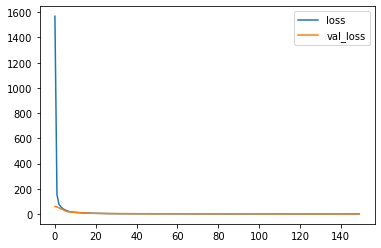

In [87]:
pd.DataFrame(model.history.history).plot()

In [88]:
preds = model.predict(X_test).ravel()
r2_score(y_test, preds)

0.9382292771888601

In [89]:
np.sqrt(mean_squared_error(y_test, preds))

0.6927911352633767

In [90]:
def predictor_energy(x):
    prediction = model.predict(x.reshape(1, 4, 6))
    return prediction.ravel()[0]
    

In [91]:
predictor_energy(np.repeat(0, 24))

64.36179

# Build CNN for STD prediction

We build a 1 dimensional convolutional neural network with 4 convolutional layers with different nodes. We train the model, and test its accuracy with a train test split function from sklearn. We measure the surrogate model R2 score and RMSE.

In [92]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y2, test_size=0.33)

In [93]:
[300, 300, 300, 6, 100] #Optimal solution from bayesian optimization at the end of the notebook.

[300, 300, 300, 6, 100]

In [94]:
model1 = Sequential()

model1.add(Dense(300, activation="relu"))
model1.add(Conv1D(300, 2, activation="relu"))
model1.add(Conv1D(300, 2, activation="relu"))
model1.add(Conv1D(6, 2, activation="relu"))
model1.add(Conv1D(100, 1, activation="relu"))

model1.add(Dense(1))


model1.compile(loss="mse", optimizer="adam")

In [95]:
model1.fit(X_train1, y_train1, epochs=150, validation_data=(X_test1, y_test1), batch_size=32,callbacks=[early_stopping], verbose=1)

Epoch 1/150
21/21 [==============================] - 1s 9ms/step - loss: 0.0277 - val_loss: 0.0085
Epoch 2/150
21/21 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.0031
Epoch 3/150
21/21 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 4/150
21/21 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/150
21/21 [==============================] - 0s 4ms/step - loss: 8.3769e-04 - val_loss: 9.5876e-04
Epoch 6/150
21/21 [==============================] - 0s 4ms/step - loss: 6.2770e-04 - val_loss: 9.0053e-04
Epoch 7/150
21/21 [==============================] - 0s 4ms/step - loss: 5.0035e-04 - val_loss: 8.0354e-04
Epoch 8/150
21/21 [==============================] - 0s 4ms/step - loss: 4.1822e-04 - val_loss: 6.8380e-04
Epoch 9/150
21/21 [==============================] - 0s 4ms/step - loss: 3.1820e-04 - val_loss: 6.4480e-04
Epoch 10/150
21/21 [==============================] - 0s 3ms/step - l

In [96]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4, 300)            2100      
                                                                 
 conv1d_4 (Conv1D)           (None, 3, 300)            180300    
                                                                 
 conv1d_5 (Conv1D)           (None, 2, 300)            180300    
                                                                 
 conv1d_6 (Conv1D)           (None, 1, 6)              3606      
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 100)            700       
                                                                 
 dense_3 (Dense)             (None, 1, 1)              101       
                                                                 
Total params: 367,107
Trainable params: 367,107
Non-tr

In [97]:
preds1 = model1.predict(X_test1).ravel()
r2_score(y_test1, preds1)

0.951761848784593

In [98]:
np.sqrt(mean_squared_error(y_test1, preds1))

0.012210365935890598

In [99]:
def predictor_std(x):
    prediction = model1.predict(x.reshape(1, 4, 6))
    return prediction.ravel()[0]

In [100]:
predictor_std(np.repeat(0, 24))

0.45715767

# Define New Optimization function

For the new optimization function we set the same method to calculate construction costs, but use our model and model1 predict() function to predict energy and standard deviation results (respectively). In the end of the function we write the function execution time, decision variables, and respective results in a csv file with previously defined file name.

In [101]:
import time
def surr_opt(xs):
    startTime = time.time()
    cost = []
    column_names = []
    x1 = []
    area = full_area.sum()
    for x in xs:
        x1 = np.append(x1, round(x))
    x = x1.astype("int")
    for i, kind in enumerate(x): 
        if i < len(buildings_str):#range for walls of each building
            for wall in walls_per_building["Building_" + str(1 + i)]:
                cost = np.append(cost, wall_costs[kind]*wall.area)
        elif i < len(buildings_str)*2: #range for roofs of each building
            for roof in roofs_per_building["Building_" + str(1 + i - len(buildings_str))]:
                cost = np.append(cost, roof_costs[kind]*roof.area)
        elif i < len(buildings_str)*3: #range for floors of each building
            for floor, ceiling in zip(floors_per_building["Building_" + str(1 + i - len(buildings_str)*2)], 
                                      ceilings_per_building["Building_" + str(1 + i - len(buildings_str)*2)]):
                cost = np.append(cost, floor_costs[kind]*floor.area)
        elif i < len(buildings_str)*4: #range for windows of each building
            for window in windows_per_building["Building_" + str(1 + i - len(buildings_str)*3)]:
                cost = np.append(cost, window_costs[kind]*window.area) #cost
      
    energy = predictor_energy(x) #energy use surrogate model
    std = predictor_std(x) #energy std surrogate model
    executionTime = time.time() - startTime #finish counting computing time
    df = pd.DataFrame(np.hstack([executionTime, x, energy, std, np.sum(cost)])).T
    df.to_csv(fname, mode='a', index=False, header=False) #write_to_file
    return [energy, std, cost.sum()]

# Test optimization - Sanity Check

Here we perform one NSGAII run with 500 iterations for our new surrogate optimization function, which instead of taking 25 seconds to perform a simulation, takes 0.25 sec. We compile the non dominated solutions variables DF, and solutions objectives
DF. Then, we perform a sanity check with our model-based optimization function, that we run with the non dominated solutions variables, and compared simulated and predicted results.

In [102]:
#[32, 0.6614712928171238, 0.9982519910035073]#optimum results
operators = CompoundOperator(SBX(0.998),PM(0.66))

In [ ]:
problem = Problem(nvars, 3)
problem.types[:] = problem_types
problem.function = surr_opt

fname = "sanity_check" + time_str() + '.csv'

with open(fname, 'a') as my_new_csv_file:
    algorithm = NSGAII(problem,
                        population_size=32,
                        variator = operators)
    algorithm.run(500)

In [ ]:
x = [s.objectives[0] for s in algorithm.result]
y = [s.objectives[1] for s in algorithm.result]
z = [s.objectives[2] for s in algorithm.result]

df_NSGAII = pd.DataFrame([x, y, z]).transpose()
df_NSGAII.columns = ["heating & cooling", "std", "total cost €"]

In [ ]:
variables = pd.DataFrame([s.variables for s in algorithm.result]).round()

In [ ]:
variables

We can use previous sanity checks from our directory, this piece of code below is just when creating a new sanity check data-set from the non-dominated solutions of a new surrogate model optimization.

In [ ]:
# fname = "sanity_check" + time_str() + ".csv"
# with open(fname, 'a') as my_new_csv_file:
#     for i in variables.index:
#         opt_output(np.array(variables.iloc[i])) 

In [ ]:
test = pd.read_csv("sanity_check2022_6_15_11_27.csv", header=None)

In [ ]:
test

In [ ]:
energy_preds = []
for i in test.index:
    energy_preds.append(model.predict(np.array(test.drop([0, 25, 26, 27], axis=1).iloc[i]).reshape(1, 4, 6)).ravel())

In [ ]:
std_preds = []
for i in test.index:
    std_preds.append(model1.predict(np.array(test.drop([0, 25, 26, 27], axis=1).iloc[i]).reshape(1, 4, 6)).ravel())

In [ ]:
#Coefficient of Determination
r2_score(test[25], energy_preds)

In [ ]:
r2_score(test[26], std_preds)

In [ ]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(test[25], energy_preds))

In [ ]:
np.sqrt(mean_squared_error(test[26], std_preds))

Below are the hyperparameters optimization for both our CNN and metaheuristics algorithms.

# Optimize CNN Layers with Bayesian Optimization using Gaussian processes

In this section we perform a Bayesian Optimization with Gaussian processes. Our objective is to minimize the RMSE of the model, and our decision variables are the nodes of the first 5 layers of our CNN - Integers from 6 to 300 nodes.  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.33) #HEating & Cooling data set y1

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y2, test_size=0.33) #STD data set y2

In [ ]:
#Lets start to optimize the layers neurons for the STD predictor.
def CNN_opt(x):
    startTime = time.time()
    #Define Model
    model = Sequential()
    #Set NN Layers
    model.add(Dense(x[0], activation="relu"))
    model.add(Conv1D(x[1], 2, activation="relu"))
    model.add(Conv1D(x[2], 2, activation="relu"))
    model.add(Conv1D(x[3], 2, activation="relu"))
    model.add(Conv1D(x[4], 1, activation="relu"))

    model.add(Dense(1))
    #Compile
    model.compile(loss="mse", optimizer="adam")
    #Define which NN to train according to the objective - Heating & Cooling and STD
    model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), batch_size=32, verbose=0, workers=10, use_multiprocessing=True)
    
    predictions = model.predict(test.drop([0, 25, 26, 27], axis=1).values.reshape(100, 4, 6))
    score = r2_score(test[25], predictions.ravel())
    mse = np.sqrt(mean_squared_error(test[25], predictions.ravel()))
    executionTime = time.time() - startTime
    print(x)
    print(score)
    print(mse)
    print(executionTime)
    print("---")
    return mse

In [ ]:
from skopt import gp_minimize

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
search_space = list()
search_space.append(Integer(6, 300))
search_space.append(Integer(6, 300))
search_space.append(Integer(6, 300))
search_space.append(Integer(6, 300))
search_space.append(Integer(6, 100))



res = gp_minimize(CNN_opt,          # the function to minimize        
                  search_space,     # the bounds on each dimension of x
                  #n_calls=20,
                  random_state=1)   # the random seed

res.x #Best values

# Experiment different algorithms, and optimize their hyperparameters with Surrogate

In [ ]:
import time
def surr_opt1(xs):
    startTime = time.time()
    cost = []
    column_names = []
    x1 = []
    area = full_area.sum()
    for x in xs:
        x1 = np.append(x1, round(x))
    x = x1.astype("int")
    for i, kind in enumerate(x):
        if i < len(buildings_str):
            for wall in walls_per_building["Building_" + str(1 + i)]:
                cost = np.append(cost, wall_costs[kind]*wall.area)
        elif i < len(buildings_str)*2:
            for roof in roofs_per_building["Building_" + str(1 + i - len(buildings_str))]:
                cost = np.append(cost, roof_costs[kind]*roof.area)
        elif i < len(buildings_str)*3:
            for floor, ceiling in zip(floors_per_building["Building_" + str(1 + i - len(buildings_str)*2)], 
                                      ceilings_per_building["Building_" + str(1 + i - len(buildings_str)*2)]):
                cost = np.append(cost, floor_costs[kind]*floor.area)
        elif i < len(buildings_str)*4:
            for window in windows_per_building["Building_" + str(1 + i - len(buildings_str)*3)]:
                cost = np.append(cost, window_costs[kind]*window.area)
      
    energy = predictor_energy(x) #Retrieve Annual heating energy and converts the total sum to Euro
    std = predictor_std(x)
    executionTime = time.time() - startTime #finish counting computing time
#   This time we dont write results into a file since we are testing multiple runs
    return [energy, std, cost.sum()]

# Optimization hyperparameters tuning

In [ ]:
problem = Problem(nvars, 3)
problem.types[:] = problem_types
problem.function = surr_opt1

In [ ]:
operators_nsga = CompoundOperator(SBX(1),PM(0.59))
operators_ibea = CompoundOperator(SBX(0.66),PM(1))
operators_smpso = CompoundOperator(SBX(0.43),PM(0.35))
operators_omopso = CompoundOperator(SBX(1),PM(0))

In [ ]:
#This cell compares the optimized metaheuristics from the optimizations performed below
from platypus import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



        
algorithms = [(NSGAII, {"population_size": 30, "variator":operators_nsga}),
              (IBEA, {"population_size": 32, "variator":operators_ibea}),
              (OMOPSO, {"swam_size":30, "leader_size":200, "max_iterations":200, "variator":operators_omopso, "epsilons":[0.001]}),
              (SMPSO, {"swam_size":68, "leader_size":59, "max_iterations":67, "variator":operators_smpso})]

# run the experiment using Python 3's concurrent futures for parallel evaluation
results = experiment(algorithms, problem, seeds=1, nfe=500)

# display the results
fig = plt.figure()

for i, algorithm in enumerate(six.iterkeys(results)):
    result = results[algorithm]["Problem"][0]

    ax = fig.add_subplot(2, 5, i+1, projection='3d')
    ax.scatter([s.objectives[0] for s in result],
               [s.objectives[1] for s in result],
               [s.objectives[2] for s in result])
    ax.set_title(algorithm)
    ax.set_xlim([30, 60])
    ax.set_ylim([0.25, 0.50])
    ax.set_zlim([400000, 900000])
    ax.view_init(elev=30.0, azim=15.0)
    ax.locator_params(nbins=4)

plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i, algorithm in enumerate(six.iterkeys(results)):
    result = results[algorithm]["Problem"][0]

    ax = fig.add_subplot(2, 2, i+1, projection="3d")
    ax.scatter([s.objectives[0] for s in result],
               [s.objectives[1] for s in result],
               [s.objectives[2] for s in result])
    ax.set_title(algorithm)
    ax.set_xlim([45, 55])
    ax.set_ylim([0.3, 0.40])
    ax.set_zlim([400000, 600000])
    ax.set_xlabel("$f_{1}$ $kWh/m^{1}$")
    ax.set_ylabel("$f_{2}$ $kWh/m^{1}$")
    ax.set_zlabel("$f_{3}$ €")
    ax.view_init(elev=30.0, azim=225)
    ax.locator_params(nbins=6)

plt.show()

### NSGAII

In [ ]:
fname = "NSGAII_opt" + time_str() + ".csv"
def NSGAii_opt(x):
    startTime = time.time()
    n_iters = 500
    ps = x[0]
    pm = x[1]
    sbx = x[2]
    operators = CompoundOperator(SBX(sbx),PM(pm))
    algorithm = NSGAII(problem, population_size=ps, variator= operators)
    algorithm.run(n_iters)
    
    hyp = Hypervolume(minimum=[30, 
                       0.25,
                       400000],
              maximum=[61, 
                       0.5,
                       900000])
    
    executionTime = time.time() - startTime
    df = pd.DataFrame([executionTime, ps, pm, sbx, hyp.calculate(algorithm.result)]).T
    df.to_csv(fname, mode='a', index=False, header=False) #write_to_file
    print("execution time: " + str(executionTime) + " s")
    print(ps, pm, sbx)
    print(hyp.calculate(algorithm.result))
    print("---")
    return -hyp.calculate(algorithm.result)

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
search_space = list()
search_space.append(Integer(30, 200)) #population size
search_space.append(Real(0, 1)) #polinomial mutation
search_space.append(Real(0, 1)) #sbx crossover


fname = "NSGAII_hyp_opt" + time_str() + ".csv"
with open(fname, "a"):
    res = gp_minimize(NSGAii_opt,          # the function to minimize        
                      search_space,     # the bounds on each dimension of x
                      #n_calls=20,
                      random_state=1)   # the random seed

In [ ]:
res.x

In [ ]:

# operators = CompoundOperator(SBX(0.59),PM(1))

# fname = "NSGAII_opt" + time_str() + '.csv'

# with open(fname, 'a') as my_new_csv_file:
#     algorithm = NSGAII(problem,
#                         population_size=30,
#                         variator = operators)
#     algorithm.run(500)



### IBEA

In [ ]:
def IBEA_opt(x):
    startTime = time.time()
    n_iters = 500
    ps = x[0]
    pm = x[1]
    sbx = x[2]
    operators = CompoundOperator(SBX(sbx),PM(pm))
    algorithm = IBEA(problem, population_size=ps, variator= operators)
    algorithm.run(n_iters)
    
    hyp = Hypervolume(minimum=[30, 
                       0.25,
                       400000],
              maximum=[61, 
                       0.5,
                       900000])
    
    executionTime = time.time() - startTime
    df = pd.DataFrame([executionTime, ps, pm, sbx, hyp.calculate(algorithm.result)]).T
    df.to_csv(fname, mode='a', index=False, header=False) #write_to_file
    print("execution time: " + str(executionTime) + " s")
    print(ps, pm, sbx)
    print(hyp.calculate(algorithm.result))
    print("---")
    return -hyp.calculate(algorithm.result)

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
search_space = list()
search_space.append(Integer(30, 200)) #population size
search_space.append(Real(0, 1)) #polinomial mutation
search_space.append(Real(0, 1)) #sbx crossover


fname = "IBEA_hyp_opt" + time_str() + ".csv"
with open(fname, "a"):
    res = gp_minimize(IBEA_opt,          # the function to minimize        
                      search_space,     # the bounds on each dimension of x
                      #n_calls=20,
                      random_state=1)   # the random seed

In [ ]:
res.x

### OMOPSO

In [ ]:
def OMOPSO_opt(x):
    startTime = time.time()
    n_iters = 500
    ss = x[0]
    ls = x[1]
    max_iter = x[2]
    pm = x[3]
    sbx = x[4]
    ep = x[5]
    operators = CompoundOperator(SBX(sbx),PM(pm))
    algorithm = OMOPSO(problem, epsilons=ep, swarm_size=ss, leader_size=ls, max_iterations=max_iter, variator= operators)
    algorithm.run(n_iters)
    
    hyp = Hypervolume(minimum=[30, 
                       0.25,
                       400000],
              maximum=[61, 
                       0.5,
                       900000])
    
    executionTime = time.time() - startTime
    df = pd.DataFrame([executionTime, ss, ls, max_iter, pm, sbx, ep, hyp.calculate(algorithm.result)]).T
    df.to_csv(fname, mode='a', index=False, header=False) #write_to_file
    print("execution time: " + str(executionTime) + " s")
    print(ss, ls, max_iter, pm, sbx, ep)
    print(hyp.calculate(algorithm.result))
    print("---")
    return -hyp.calculate(algorithm.result)

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
search_space = list()
search_space.append(Integer(30, 200)) #swarm size
search_space.append(Integer(30, 200)) #leader size
search_space.append(Integer(30, 200)) #max_iter
search_space.append(Real(0, 1)) #polinomial mutation
search_space.append(Real(0, 1)) #sbx crossover
search_space.append(Real(0.001, 1)) #Epsilons

fname = "OMOPSO_hyp_opt" + time_str() + ".csv"
with open(fname, "a"):
    res = gp_minimize(OMOPSO_opt,          # the function to minimize        
                      search_space,     # the bounds on each dimension of x
                      #n_calls=20,
                      random_state=1)   # the random seed

In [ ]:
res.x #NSGAII optimal

### SMPSO

In [ ]:
def SMPSO_opt(x):
    startTime = time.time()
    n_iters = 500
    ss = x[0]
    ls = x[1]
    max_iter = x[2]
    pm = x[3]
    sbx = x[4]
    operators = CompoundOperator(SBX(sbx),PM(pm))
    algorithm = SMPSO(problem, swarm_size=ss, leader_size=ls, max_iterations=max_iter, variator= operators)
    algorithm.run(n_iters)
    
    hyp = Hypervolume(minimum=[30, 
                       0.25,
                       400000],
              maximum=[61, 
                       0.5,
                       900000])
    
    executionTime = time.time() - startTime
    df = pd.DataFrame([executionTime, ss, ls, max_iter, pm, sbx, hyp.calculate(algorithm.result)]).T
    df.to_csv(fname, mode='a', index=False, header=False) #write_to_file
    print("execution time: " + str(executionTime) + " s")
    print(ss, ls, max_iter, pm, sbx)
    print(hyp.calculate(algorithm.result))
    print("---")
    return -hyp.calculate(algorithm.result)

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
search_space = list()
search_space.append(Integer(30, 200)) #swarm size
search_space.append(Integer(30, 200)) #leader size
search_space.append(Integer(30, 200)) #max_iter
search_space.append(Real(0, 1)) #polinomial mutation
search_space.append(Real(0, 1)) #sbx crossover

fname = "SMPSO_hyp_opt" + time_str() + ".csv"
with open(fname, "a"):
    res1 = gp_minimize(SMPSO_opt,          # the function to minimize        
                      search_space,     # the bounds on each dimension of x
                      #n_calls=20,
                      random_state=1)   # the random seed

In [ ]:
res1.x #NSGAII optimal

# Final Results

In [ ]:
problem = Problem(nvars, 3)
problem.types[:] = problem_types
problem.function = surr_opt

fname = "FINAL_NSGAII" + time_str() + '.csv'

with open(fname, 'a') as my_new_csv_file:
    algorithm = NSGAII(problem,
                        population_size=600,
                        variator = operators_nsga)
    algorithm.run(10000)

In [ ]:
hyp = Hypervolume(minimum=[30, 
                       0.25,
                       400000],
              maximum=[61, 
                       0.5,
                       900000])
hyp.calculate(algorithm.result)

In [ ]:
x = [s.objectives[0] for s in algorithm.result]
y = [s.objectives[1] for s in algorithm.result]
z = [s.objectives[2] for s in algorithm.result]

df_NSGAII = pd.DataFrame([x, y, z]).transpose()
df_NSGAII.columns = ["heating & cooling", "std", "total cost €"]

In [ ]:
### Visualize Surrogate Non-Dominated solutions
import plotly.graph_objects as go
fig = go.Figure()
dfs = {"NSGAII" : df_NSGAII}

for i in dfs:
    fig = fig.add_trace(go.Scatter3d(#data_frame = dfs[i],
                                    x = dfs[i]["heating & cooling"],
                                    y = dfs[i]["std"],
                                    z = dfs[i]["total cost €"],
                                    name = i,
                                    opacity = 0.7,
                                    #line = None,
                                    mode = "markers",
                                    marker = dict(size = 0),
                                    #alphahull =0,
                                    showlegend= True))
    


fig = fig.add_trace(go.Scatter3d(#data_frame = dfs[i],
                                    x = np.array(surr_opt1(x2)[0]),
                                    y = np.array(surr_opt1(x2)[1]),
                                    z = np.array(surr_opt1(x2)[2]),
                                    name = "Most Expensive",
                                    opacity = 1,
                                    #line = None,
                                    mode = "markers",
                                    marker = dict(size = 0),
                                    #alphahull =0,
                                    showlegend= True))

fig.update_layout(
    scene=dict(
        xaxis_title='f<sub>1</sub> kWh/m<sup>2</sup>',
        yaxis_title='f<sub>2</sub> kWh/m<sup>2</sup>',
        zaxis_title='f<sub>3</sub> €',
    ),
)
    
fig.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sorts = pd.read_csv("sorts.csv")

In [ ]:
sorts

In [ ]:
g = sns.lineplot(x = sorts.index, y=sorts["OMOPSO"])
sns.lineplot(x = sorts.index, y=sorts["SMPSO"])
sns.lineplot(x = sorts.index, y=sorts["NSGAII"])
sns.lineplot(x = sorts.index, y=sorts["IBEA"])
g.legend(["OMOPSO", "SMPSO", "NSGAII", "IBEA"])

This work was supported by international funds through Fundo Europeu de Desenvolvimento Regional (FEDER) with reference <i> POCI-01-0247-FEDER-045919 </i>, national funds through PhD grant under contract of FCT with reference <i>2021.04849.BD.</i><p>
If you use this notebook for research purposes please cite: <p>
<i>G. Araujo, L. Santos, A. Leitão, and R. Gomes, “Ad-based surrogate models for simulation and optimization of large urban areas,” in 27th International Conference of the Association for Computer-Aided Architectural Design Research in Asia (CAADRIA 2022)